# DATA 622 Assignment 1

Erick Hadi

# Introduction

This assignment focuses on one of the most important aspects of data science, Exploratory Data Analysis (EDA). Many surveys show that data scientists spend 60-80% of their time on data preparation. EDA allows you to identify data gaps & data imbalances, improve data quality, create better features and gain a deep understanding of your data before doing model training - and that ultimately helps train better models. In machine learning, there is a saying - "better data beats better algorithms" - meaning that it is more productive to spend time improving data quality than improving the code to train the model.

This will be an exploratory exercise, so feel free to show errors and warnings that arise during the analysis.

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

A Portuguese bank conducted a marketing campaign (phone calls) to predict if a client will subscribe to a term deposit  The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyze the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to the bank's term deposit. Download the Bank Marketing Dataset from: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [107]:
file_path = "bank-additional-full.csv"
data = pd.read_csv(file_path, sep=';')

In [108]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Cleaning

In [109]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [110]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace('.', '_', regex=False)
    .str.replace(' ', '_')
)

print(data.columns.tolist())


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


## Exploratory Data Analysis

Review the structure and content of the data and answer questions such as:
- Are the features (columns) of your data correlated?
- What is the overall distribution of each variable?
- Are there any outliers present?
- What are the relationships between different variables?
- How are categorical variables distributed?
- Do any patterns or trends emerge in the data?
- What is the central tendency and spread of each variable?
- Are there any missing values and how significant are they?

### Are there any missing values and how significant are they?

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [112]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In this dataset there are no missing values. This means that we do not need to fill in missing values.

In [113]:
data.replace('unknown', np.nan, inplace=True)

if 'pdays' in data.columns:
    data['pdays'] = data['pdays'].replace(999, np.nan)

In [114]:
missing_summary = data.isnull().sum()
print(missing_summary[missing_summary > 0].sort_values(ascending=False))

pdays        39673
default       8597
education     1731
housing        990
loan           990
job            330
marital         80
dtype: int64


After replacing odd values such as unknown and 999, there maybe a lot of missing values. pdays has about a 91% null rate. In that case dropping those values will make the dataset useless. And so the other options are to impute and fill in that data or even disregard that column compeletely. The latter would be ideal if it had no predictive power.

### What is the overall distribution of each variable?

Splitting between categorical and numerical features

In [115]:
categorical_cols = data.select_dtypes(include=['object']).columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

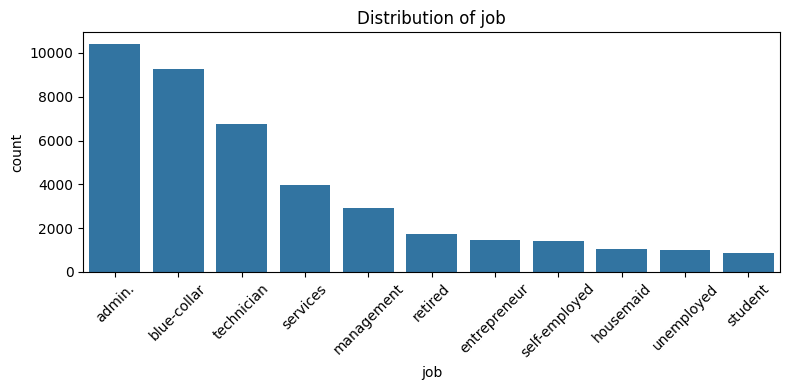

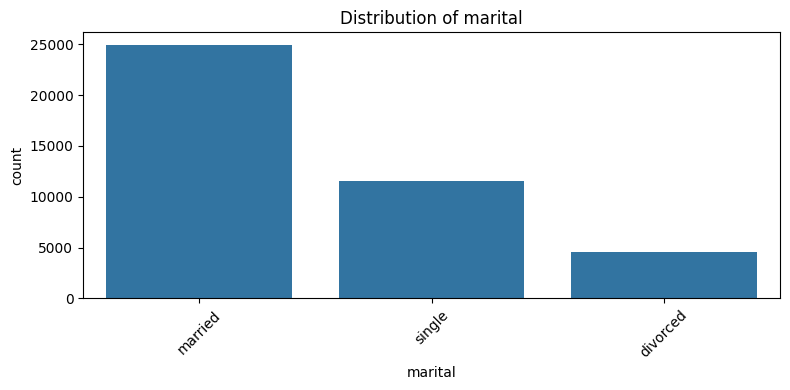

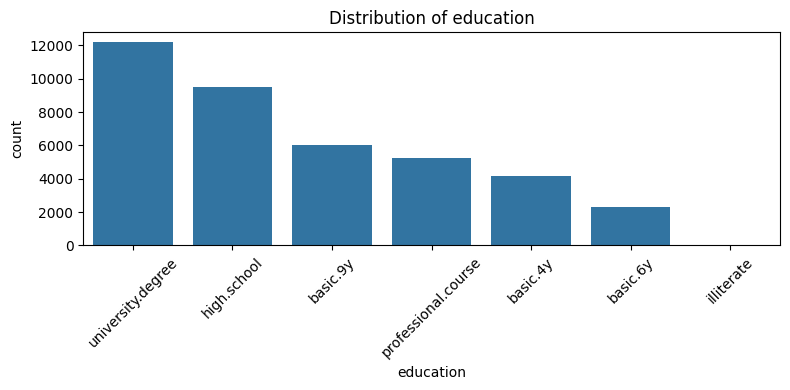

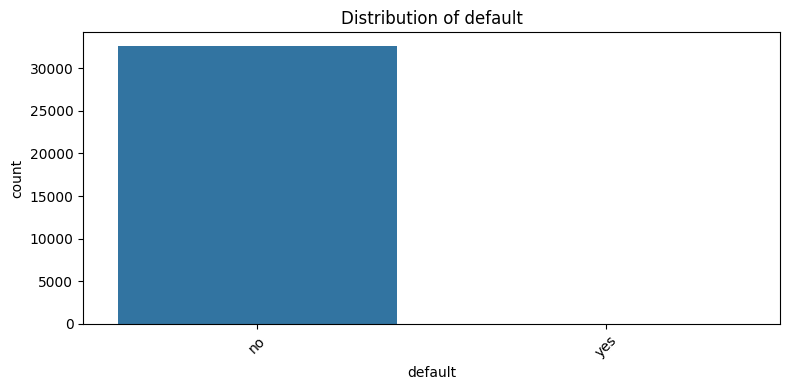

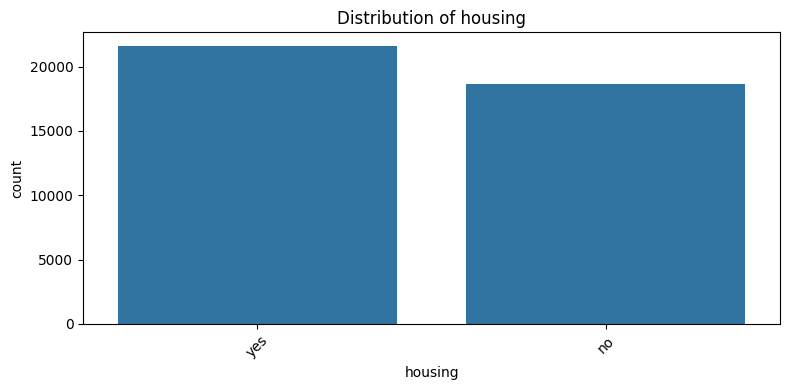

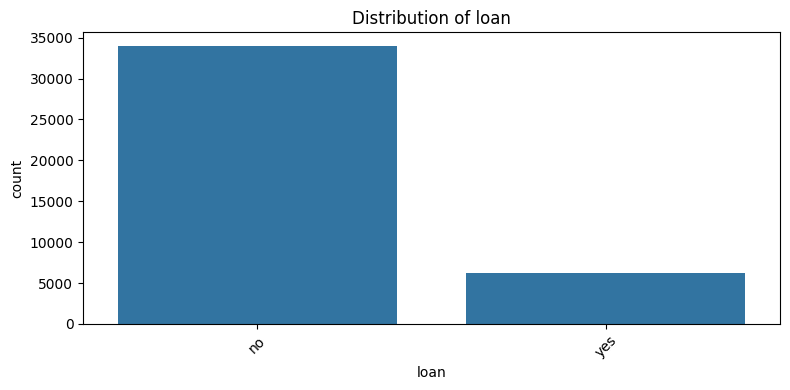

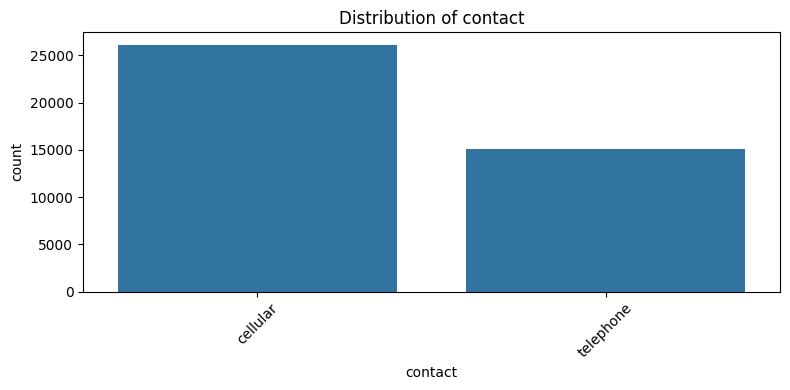

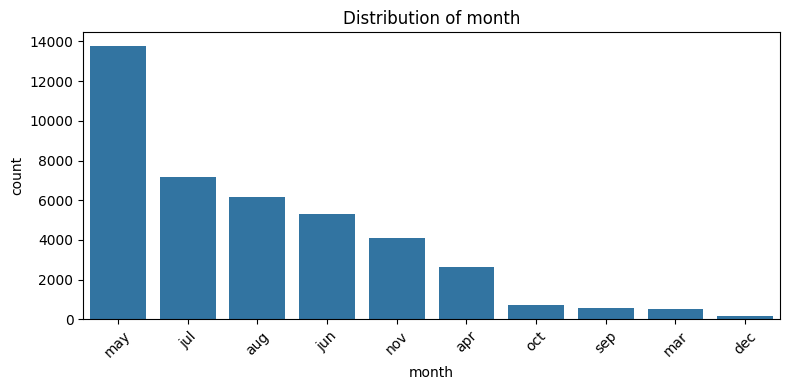

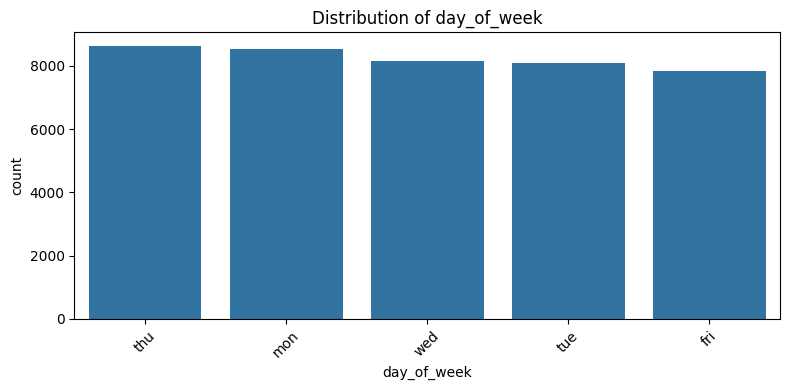

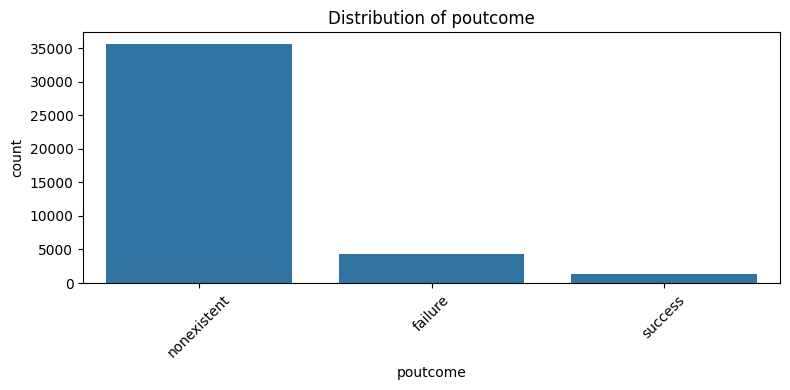

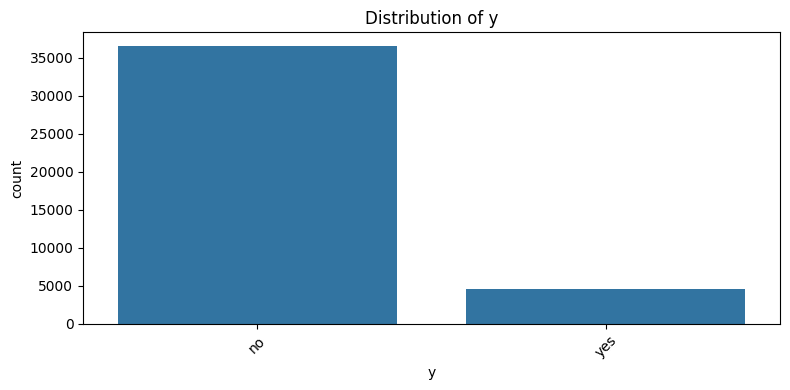

In [116]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

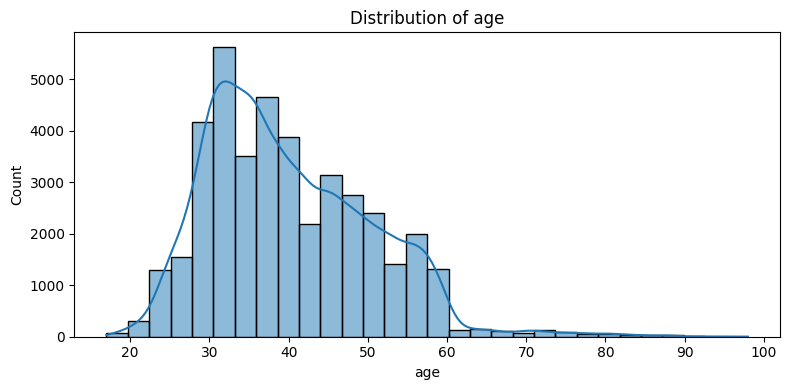

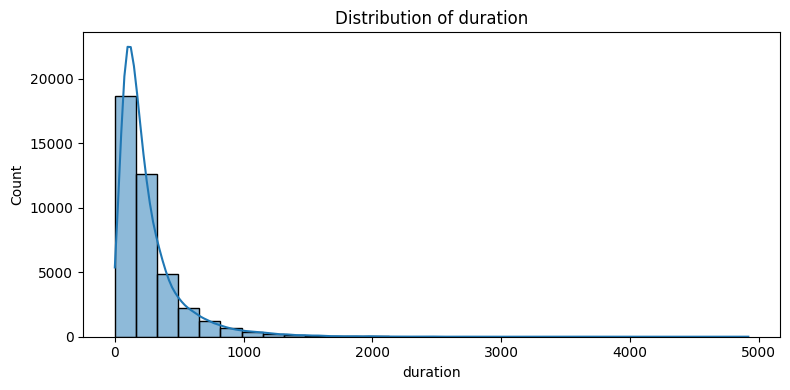

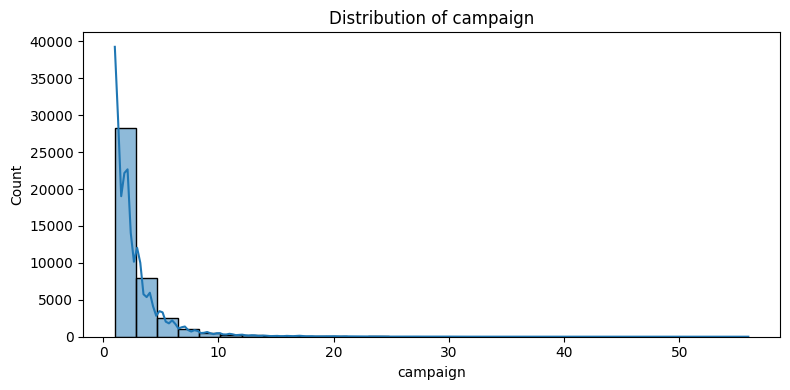

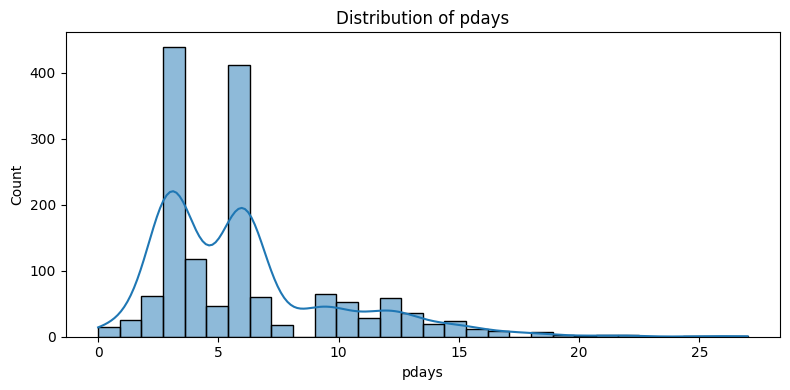

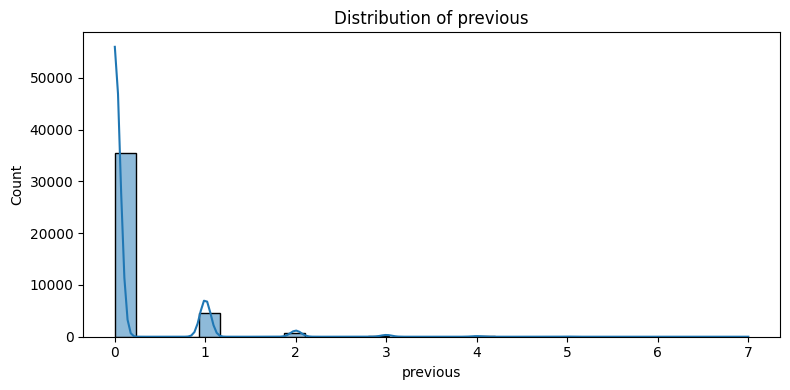

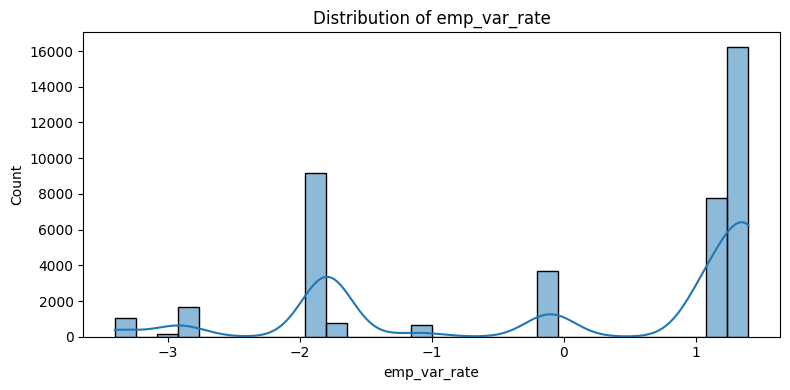

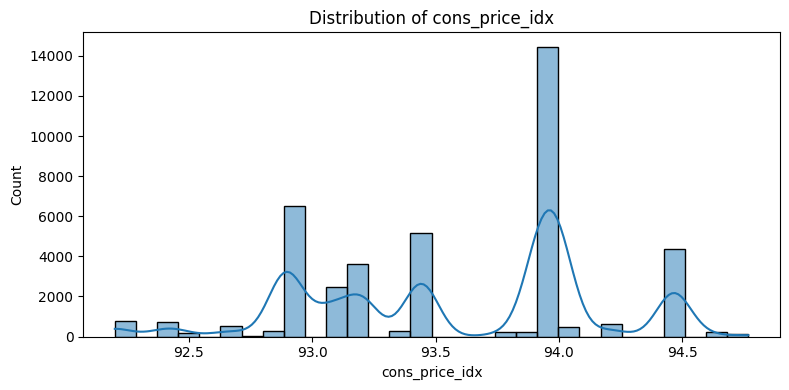

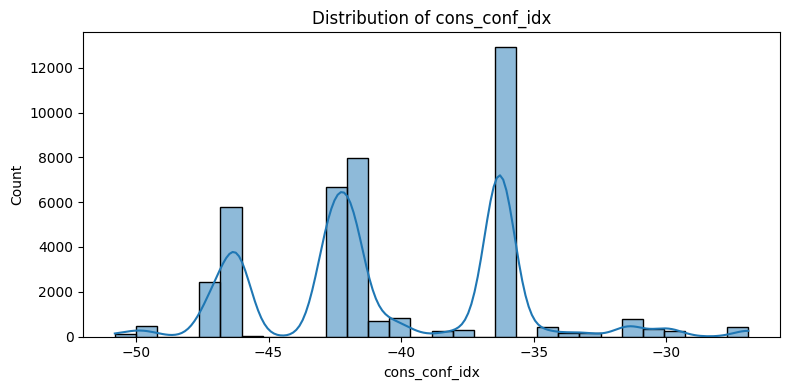

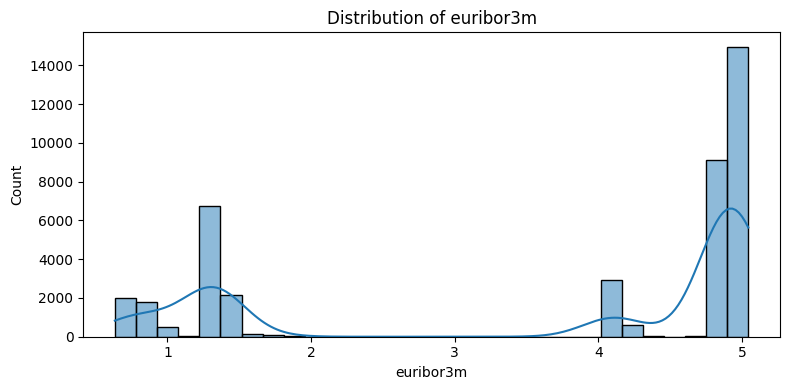

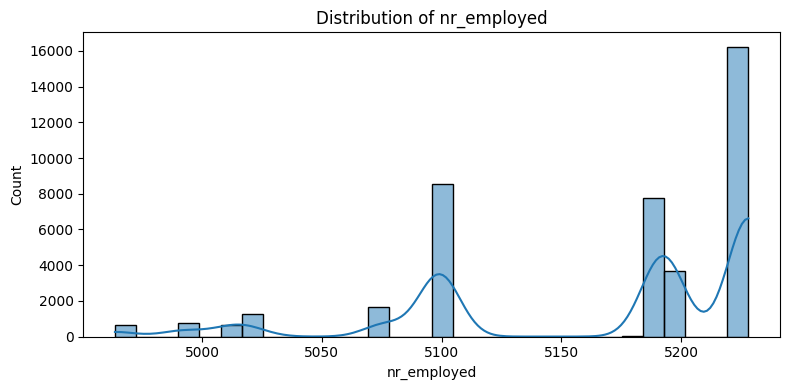

In [117]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

### Are the features (columns) correlated?

### Are there any outliers present?

Using Boxplots to visually check for any outliers

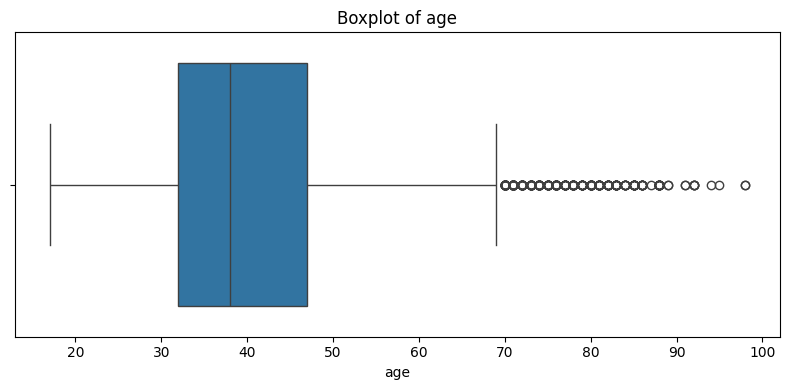

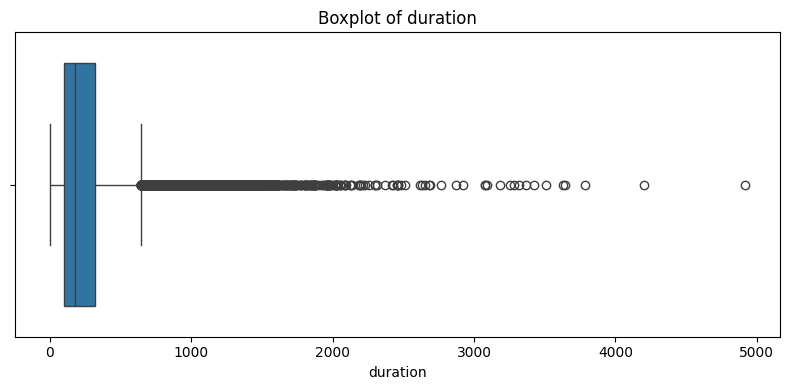

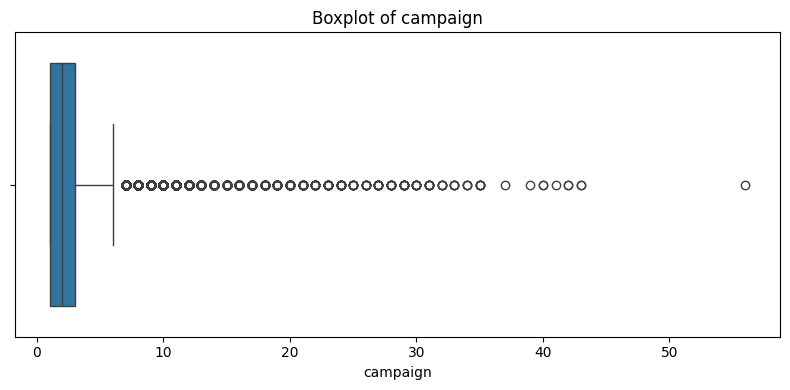

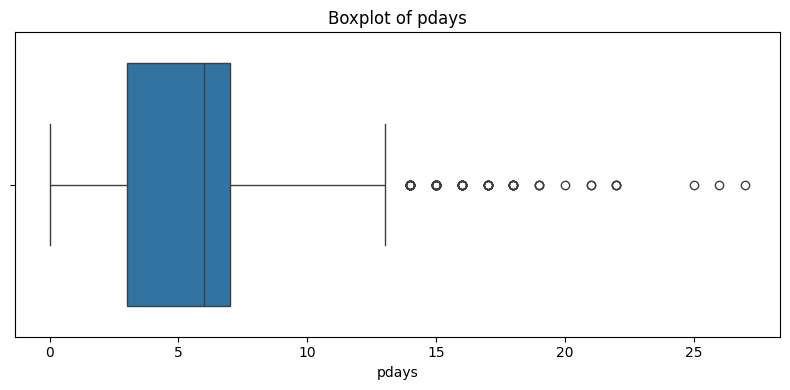

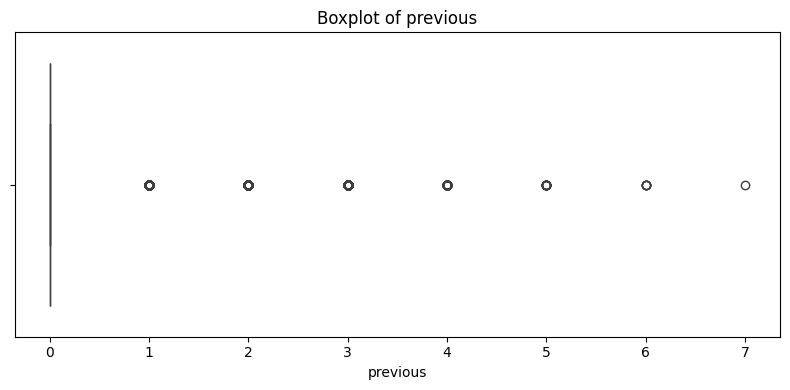

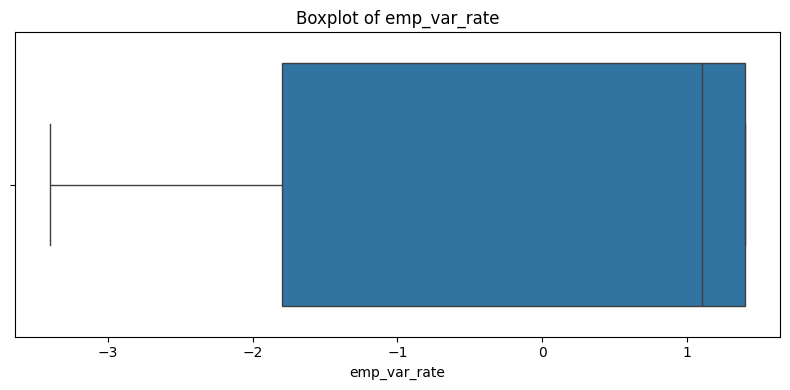

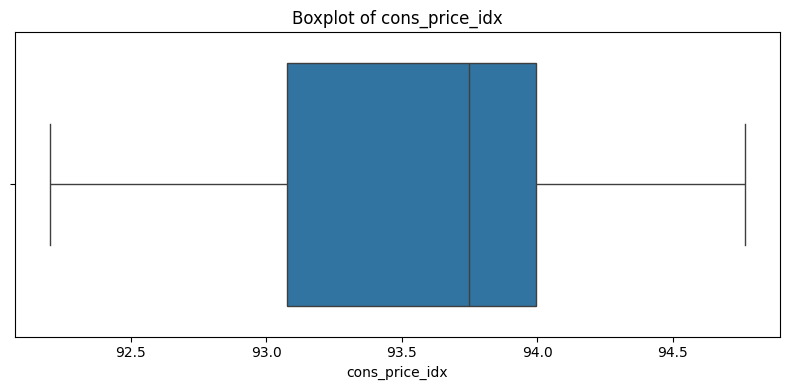

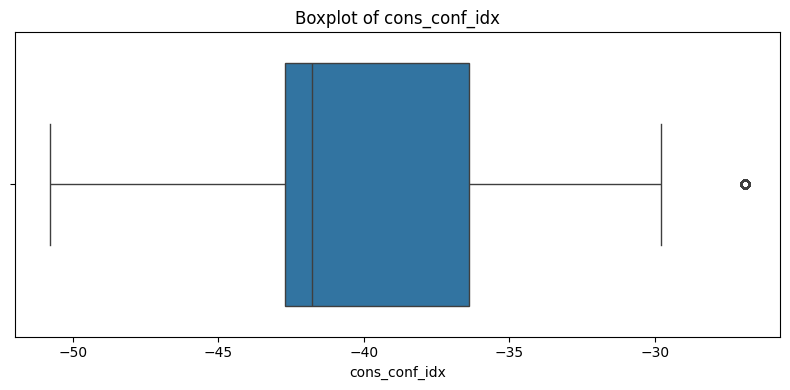

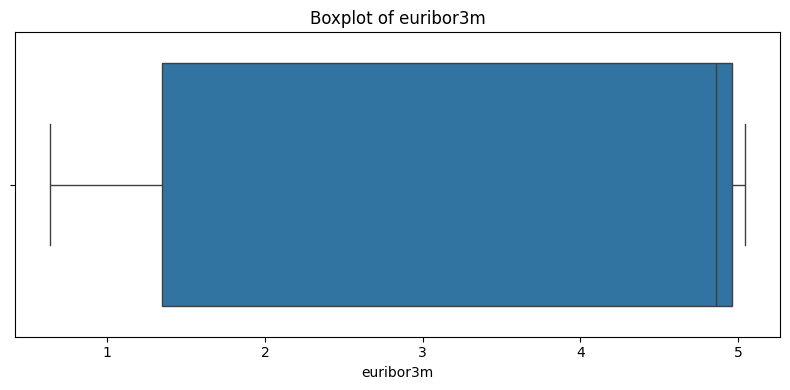

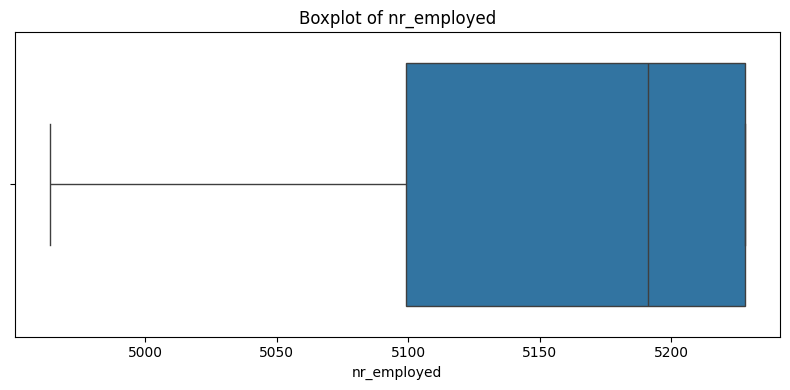

In [118]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

Using Interquartile rage to determine at outliers

In [119]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")

age: 469 outliers
duration: 2963 outliers
campaign: 2406 outliers
pdays: 82 outliers
previous: 5625 outliers
emp_var_rate: 0 outliers
cons_price_idx: 0 outliers
cons_conf_idx: 447 outliers
euribor3m: 0 outliers
nr_employed: 0 outliers


Using Z-score method to determine outliers, this method assumes normality

In [120]:
from scipy.stats import zscore

z_scores = data[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3)

outlier_counts = outliers.sum()
print(outlier_counts)

age                369
duration           861
campaign           869
pdays                0
previous          1064
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
dtype: int64


### Are the features (columns) of your data correlated?

In [121]:
correlation_matrix = data[numeric_cols].corr()

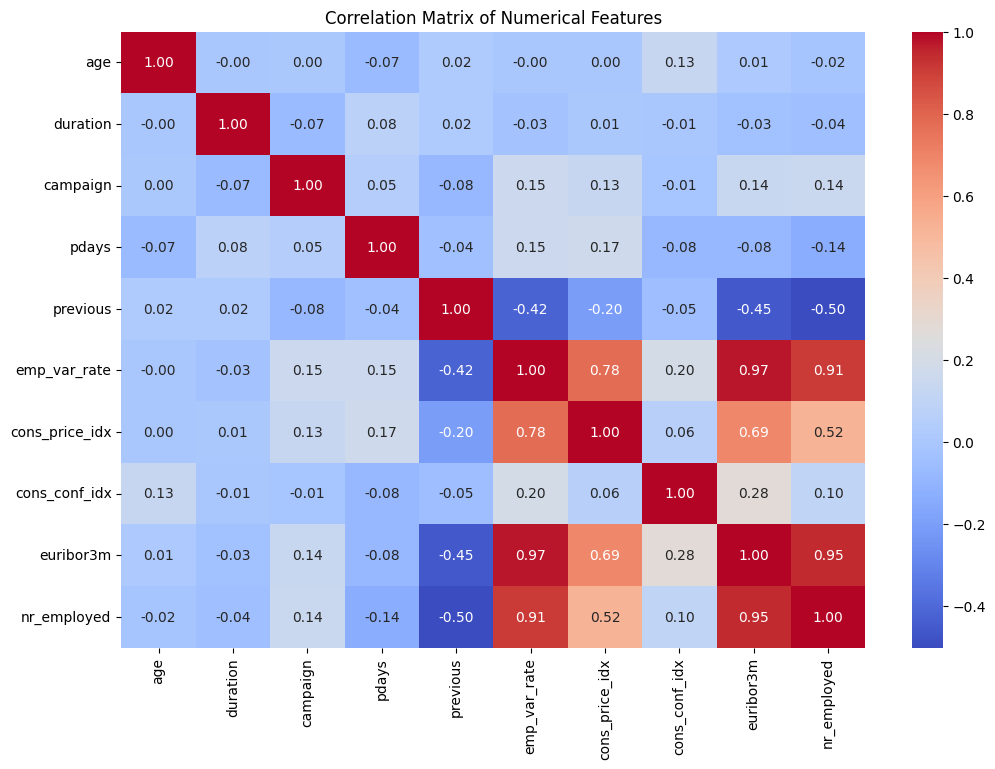

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Do any patterns or trends emerge in the data?

One of the patterns I noticed is that subscipritons are higher in certain months over others.

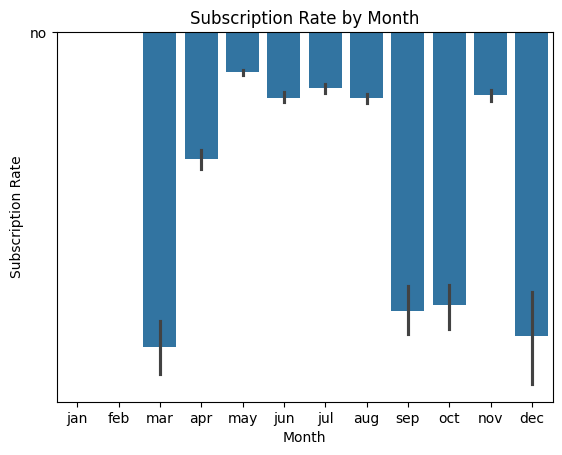

In [123]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

sns.barplot(x='month', y='y', data=data, estimator=np.mean, order=month_order)
plt.title('Subscription Rate by Month')
plt.ylabel('Subscription Rate')
plt.xlabel('Month')
plt.show()

### What is the central tendency and spread of each variable?

In [124]:
data[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,1515.0,6.014521,3.824906,0.000,3.000,6.000,7.000,27.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [125]:
for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(data[col].value_counts(normalize=True).round(2))


job distribution:
job
admin.           0.26
blue-collar      0.23
technician       0.17
services         0.10
management       0.07
retired          0.04
entrepreneur     0.04
self-employed    0.03
housemaid        0.03
unemployed       0.02
student          0.02
Name: proportion, dtype: float64

marital distribution:
marital
married     0.61
single      0.28
divorced    0.11
Name: proportion, dtype: float64

education distribution:
education
university.degree      0.31
high.school            0.24
basic.9y               0.15
professional.course    0.13
basic.4y               0.11
basic.6y               0.06
illiterate             0.00
Name: proportion, dtype: float64

default distribution:
default
no     1.0
yes    0.0
Name: proportion, dtype: float64

housing distribution:
housing
yes    0.54
no     0.46
Name: proportion, dtype: float64

loan distribution:
loan
no     0.84
yes    0.16
Name: proportion, dtype: float64

contact distribution:
contact
cellular     0.63
telephone    0.37


## Algorithm Selection

Now you have completed the EDA, what Algorithms would suit the business purpose for the dataset. Answer questions such as:
- Select two or more machine learning algorithms presented so far that could be used to train a model
(no need to train models - I am only looking for your recommendations).
- What are the pros and cons of each algorithm you selected?
- Which algorithm would you recommend, and why?
- Are there labels in your data? Did that impact your choice of algorithm?
- How does your choice of algorithm relates to the dataset?
- Would your choice of algorithm change if there were fewer than 1,000 data records, and why?

This dataset is used to predict whether a client will subscribe, yes/no. The dataset has labeled outcomes. Which means that it is best suited for supervised learning algorithms.

In this scenario, three algortihms seem to be well fit for the task: Logistic Regression, Random Forest Classifier, and Gradient Boosting.

Logistic Regression is one of the more fundamental algortithms and the baseline for binary classifcation tasks. It is simple and fast to train, has interpretable coefficients which is highly useful for business, it handles categorical and numerical data well if they are encoded, and provides probabilities as well. However, it assumes linearity between features and the log odds of the target and is sensitive to multicollinearity. It also underperforms when trained on complex or non linear patterns.


Random Forest is an ensemble algorithm of decision trees. It handles non linear relationships much better then logistic regression. It performs well when their are outliers and multicollinearity. However, it is less interpretable than logistic regression and much more computationally expensive. Also if not tuned properly may be prone to overfitting.

Lastly Gradient Boosting, is one of the more accurate and advanced algorithms in performing classifications tasks. It has built in handling for missing data and can handle imbalances in the datasets with tuning. It also has very good control over bias variance through hyperparameters. However, it slower to train and harder to interpret. It also has a high risk of overfitting on smaller datasets.

The algorithm that seems best out of the three for this task is Random Forest. Since the dataset has both categorical and numerical features which interact in non linear ways, Random Forest will perform better than logistic regression. Also there is no need for heavy preprocessing and the dataset is not that large. Random Forest robustness to overfitting would put it over gradient boosting.

The size of the dataset effects which algorithm performs better. More advanced algorithms are prone to overfitting on smaller datasets.

## Pre-processing

Now you have done an EDA and selected an Algorithm, what pre-processing (if any) would you require for:
- Data Cleaning - improve data quality, address missing data, etc.
- Dimensionality Reduction - remove correlated/redundant data than will slow down training
- Feature Engineering - use of business knowledge to create new features
- Sampling Data - using sampling to resize datasets
- Data Transformation - regularization, normalization, handling categorical variables
- Imbalanced Data - reducing the imbalance between classes

Data Cleaning - improve data quality, address missing data, etc.

In [126]:
data.replace('unknown', np.nan, inplace=True)

if 'pdays' in data.columns:
    data['pdays'] = data['pdays'].replace(999, np.nan)

In [127]:
missing_summary = data.isnull().sum()
print(missing_summary[missing_summary > 0].sort_values(ascending=False))

pdays        39673
default       8597
education     1731
housing        990
loan           990
job            330
marital         80
dtype: int64


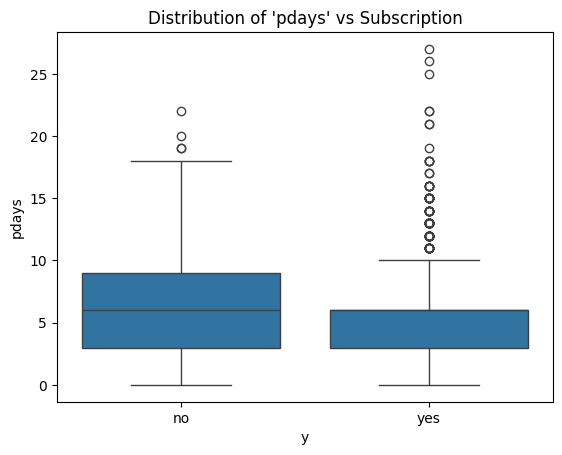

In [128]:
sns.boxplot(x='y', y='pdays', data=data[data['pdays'] != -1])
plt.title("Distribution of 'pdays' vs Subscription")
plt.show()

Dimensionality Reduction - remove correlated/redundant data than will slow down training

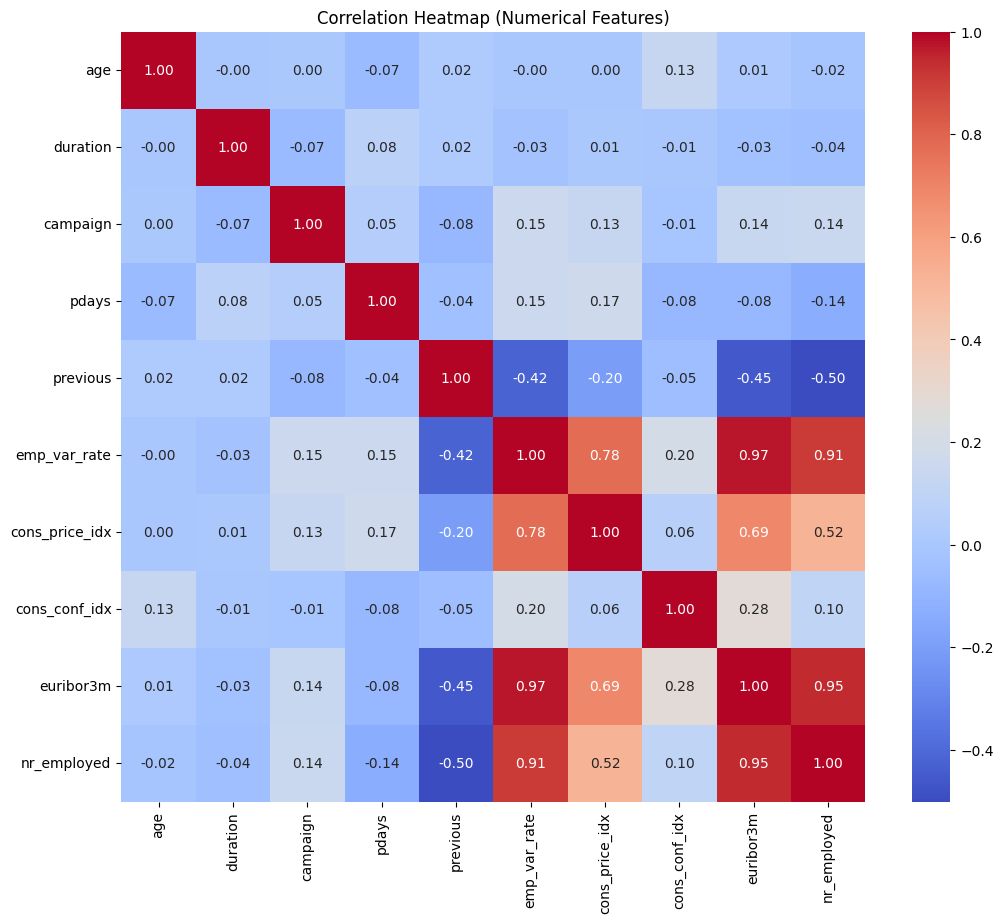

In [129]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

emp_var_rate and euribor3m	0.97

euribor3m	and nr_employed	0.95

emp.var_rate and nr_employed	0.93

It seems that dropping emp var rate and nr employed would be beneficial since these three are highly correlated.

In [130]:
data.drop(columns=['emp_var_rate', 'nr_employed'], inplace=True)

## Feature Engineering

In [131]:
data['contacted_before'] = (data['previous'] > 0).astype(int)

In [132]:
data['has_credit_risk'] = (
    (data['housing'] == 'yes') |
    (data['loan'] == 'yes') |
    (data['default'] == 'yes')
).astype(int)

Sampling and Handling Class Imbalance

In [133]:
print(data['y'].value_counts())
print(data['y'].value_counts(normalize=True))


y
no     36548
yes     4640
Name: count, dtype: int64
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


Splitting dataset

In [135]:
y = data['y'].map({'yes': 1, 'no': 0})
X = data.drop(columns=['y'])

X = pd.get_dummies(X, drop_first=True)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Training and Testing Model

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [140]:
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [141]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[7139  171]
 [ 522  406]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238

ROC-AUC Score: 0.9480187007641869
